<a href="https://colab.research.google.com/github/htapiagroup/fis_uv/blob/master/Tarea_Mapeo_log%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tareas - Mapeo Logístico

1.   Deducir una expresión para el segundo mapeo y corroborar que da el mismo resultado que aplicar el primer mapeo al segundo.

2.   Crear un conjunto de líneas rectas que unan puntos del mapeo logístico; es decir, por ejemplo, sea un punto $P_1$ con coordenadas $x_0$ y su mapeo $x_1=M(r,x_0)$ entonces $P_1=(x_0,x_1)$. El segundo punto $P_2$ será su imagen en la recta $P_2=(x_1,x_1)$, con estos dos puntos se construye una línea recta.

3. Hacer un subplot de gráficas: uno para la trayectoria normal como en el punto anterior y, la segunda un plot de secuencia vs no. de iteraciones

4. Aplicar el mapeo varias veces y graficar con *scatter*.

5. ¿Para qué valor de $r$, la diferencial (línea recta cuya pendiente es la derivada) en el punto fijo intercepta a la recta identidad en exactamente 45 grados?



# Actividad 1

Se sabe que la expresión para el mapeo logístico está dada por.

$$ f(x) = rx(1-x) $$

con $r \in \mathbb{R}$. 

Sea $x$ un valor inicial arbitrario, entonces su  primer mapeo $m_1$ estará dado por.

$$ m_1 = r x (1-x)$$

Sabiendo esto, se contruye el segundo mapeo $m_2$ sutituyendo el primero $m_1$ el la fórmula del mapeo logístico, esto es,

$$ m_2 = r m_1 ( 1 - m_1 ) $$

Se sustituye $m_1$ en $m_2$.

\begin{align}
m_2 & =r[r x (1-x)][1-r x (1-x)] \\
& = r^2x(1-x) - r^3x^2(1-x)^2 \\
& = r^2x - r^2x^2 - r^3x^2 (1 - 2 x + x^2) \\
& = r^2x - r^2x^2 - r^3x^2 + 2 r^3x^3 - r^3x^4
\end{align}

La ecuación 

$$ m_2 = r^2x - r^2x^2 - r^3x^2 + 2 r^3x^3 - r^3x^4 $$ debe funcionar igual que $$ m_2 = rm_1(1-m_1) $$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

Se procede a graficar el segundo mapeo con las fórmulas propuestas. Se elige $r=3.8$

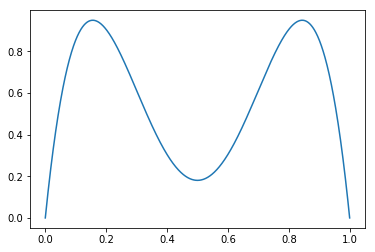

In [0]:
def M(r,x):
  return r*x*(1-x)

r=3.8
x = np.linspace(0,1,1000)

m1 = M(r,x)
m2 = M(r,m1)

plt.plot(x,m2)

Para la fórmula de grado cuatro

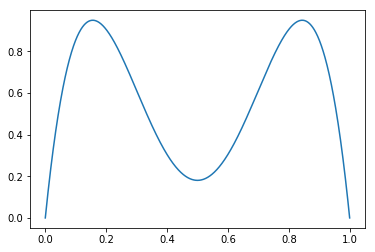

In [0]:
def m(r,x):
  return r**2*x - r**2*x**2 - r**3*x**2 + 2*r**3*x**3 - r**3*x**4

plt.plot(x,m(r,x))

Se corrobora que arrojan el mismo resultado.

# Actividad 2

Para la siguiente actividad se estudiará el primer mapeo con la recta $y=x$.

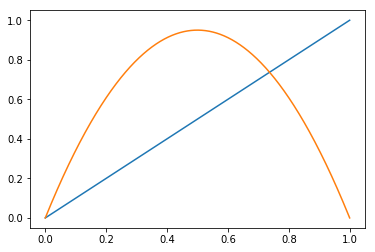

In [0]:
plt.plot(x,x,x,m1)

Se conoce que el punto fijo $x_f$ de la función logistica es,

$$ x_f = 1 - \frac{1}{r} $$

Para $r=3.8 \implies x_0 \approx 0.736842105263158 $, se elige un $x$ cercano a $x_f$, por ejemplo $x_0 = 0.7368$. 

Su primer mapeo $m_1 = x_1$ será.

In [0]:
x0 = 0.7368
x1 = M(r,x0)
x1

0.736917888

Se cuentan ya con dos puntos, el primero $(x_0,x_1)$ y el segundo su imagen en la recta $(x_1,x_1)$. A continuación se crea un código para crear rectas dados dos puntos.

In [0]:
def recta(x0,y0,x1,y1):
  if (x1 - x0) != 0:
    return (y1 - y0)/(x1 - x0), y0 - x0*(y1 - y0)/(x1 - x0); # Se regresan dos argumentos, uno es la pendiente y el otro la ordenada al origen.
  else:
    return 1/x, x0 - 1 # En este caso la línea recta es totalmente vertical. Conviene que la recta tome el valor constante x0, esto se logra haciendo
                       # la pendiente m=1/x y la ordenada b=x0-1 y=mx+b ---> y =(1/x)x + (x0-1) = 1 + x0 -1 = x0, por lo tanto y=x0. 
                       # Al momento de graficar se invierte **y** por **x**.

Se grafica la recta $y = x$, el primer mapeo y la recta con los dos puntos.

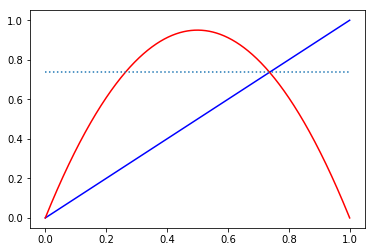

In [0]:
plt.plot(x,x,'b-',x,m1,'r') # Funciones. Mapeo logístico (roja) y recta y=x (azul)

# La primera recta se forma con los puntos (x0,x1) y (x1,x1)

y1 = recta(x0,x1,x1,x1)[0]*x + recta(x0,x1,x1,x1)[1]

plt.plot(x,y1,ls='dotted') # Recta punteada

Se hace un zoom a la zona de interés

(0.7366, 0.7371)

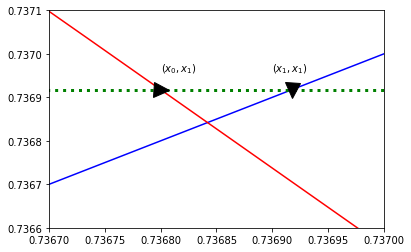

In [0]:
plt.plot(x,x,'b-',x,m1,'r-')

plt.plot(x,y1,'g:',lw=3) #Recta que une a los puntos (x0,x1) con (x1,x1)

#Puntos (triángulos)
plt.plot(x0,M(r,x0), marker='>', ms=15, color='black') # Punto inicial (x0,f(x0)) o bien (x0,x1)
plt.plot(M(r,x0),M(r,x0), marker='v', ms=15, color='black') # Segundo punto (x1,x1)
text(0.7368, 0.73696, '$(x_0,x_1)$')
text(0.7369, 0.73696, '$(x_1,x_1)$')

plt.xlim([0.7367,0.7370])
plt.ylim([0.7366,0.7371])

Analogamente se hacen las demás rectas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


(0.7366, 0.7371)

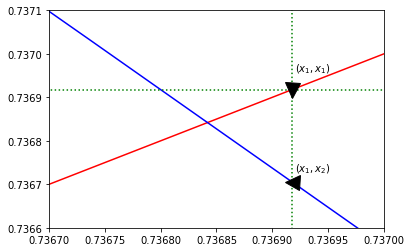

In [0]:
x2 = M(r,x1)

# Para la segunda recta y2, se toman los puntos (x1,x1) y (x1,x2)

y2 = recta(x1,x1,x1,x2)[0]*x + recta(x1,x1,x1,x2)[1]

plt.plot(x,x,'r-',x,m1,'b-')
plt.plot(x,y1,'g:')
plt.plot(y2,x,'g:') #Se invierte y2 por x, puesto que la línea es totalmente vertical.

#Puntos
plt.plot(M(r,x0),M(r,x0), marker='v', ms=15, color='black') # Punto (x1,x1)
plt.plot(M(r,x0),M(r,M(r,x0)), marker='<', ms=15, color='black') # Punto (x1,x2)
text(0.73692, 0.73696, '$(x_1,x_1)$')
text(0.73692, 0.73673, '$(x_1,x_2)$')

plt.xlim([0.7367,0.7370])
plt.ylim([0.7366,0.7371])

Para las siguientes dos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


(0.7366, 0.7372)

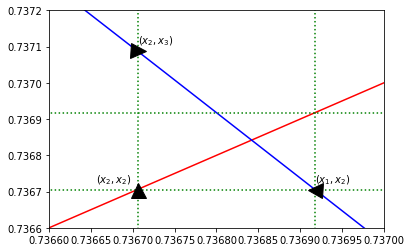

In [0]:
x3 = M(r,x2)

# Para la tercera recta y3, se toman los puntos (x1,x2) y (x2,x2)
# Para la cuarta recta y4, se toman los puntos (x2,x2) y (x2,x3)

y3 = recta(x1,x2,x2,x2)[0]*x + recta(x1,x2,x2,x2)[1]
y4= recta(x2,x2,x2,x3)[0]*x + recta(x2,x2,x2,x3)[1]

plt.plot(x,x,'r-',x,m1,'b-')
plt.plot(x,y1,'g:',y2,x,'g:',x,y3,'g:',y4,x,'g:')

# Puntos
plt.plot(M(r,x0),M(r,M(r,x0)), marker='<', ms=15, color='black') # Punto (x1,x2)
plt.plot(M(r,M(r,x0)),M(r,M(r,x0)), marker='^', ms=15, color='black') # Punto (x2,x2)
plt.plot(M(r,M(r,x0)),M(r,M(r,M(r,x0))), marker='>', ms=15, color='black') # Punto (x2,x3)

text(M(r,x0),M(r,M(r,x0))+2e-5, '$(x_1,x_2)$')
text(M(r,M(r,x0))-5e-5,M(r,M(r,x0))+2e-5, '$(x_2,x_2)$')
text(M(r,M(r,x0)), M(r,M(r,M(r,x0)))+2e-5, '$(x_2,x_3)$')

plt.xlim([0.7366,0.7370])
plt.ylim([0.7366,0.7372])

Para las demás rectas se observa que uno se aleja cada vez más del punto fijo. La flecha roja indica en comienzo; siguiendo el camino de las flechas se visualiza la divergencia respecto del punto fijo.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


(0.736, 0.7379)

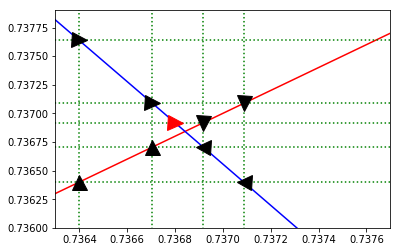

In [0]:
x4 = M(r,x3)
x5 = M(r,x4)
x6 = M(r,x5)

# Para la quinta recta y5, se toman los puntos (x2,x3) y (x3,x3)
# Para la sexta recta y6, se toman los puntos (x3,x3) y (x3,x4)
# Para la séptima recta y7, se toman los puntos (x3,x4) y (x4,x4)
# Para la octava recta y8, se toman los puntos (x4,x4) y (x4,x5)
# Para la novena recta y9, se toman los puntos (x5,x5) y (x5,x6)

y5 = recta(x2,x3,x3,x3)[0]*x + recta(x2,x3,x3,x3)[1]
y6 = recta(x3,x3,x3,x4)[0]*x + recta(x3,x3,x3,x4)[1]
y7 = recta(x3,x4,x4,x4)[0]*x + recta(x3,x4,x4,x4)[1]
y8 = recta(x4,x4,x4,x5)[0]*x + recta(x4,x4,x4,x5)[1]
y9 = recta(x5,x5,x5,x6)[0]*x + recta(x5,x5,x5,x6)[1]

plt.plot(x,x,'r-',x,m1,'b-')
plt.plot(x,y1,'g:',y2,x,'g:',x,y3,'g:',y4,x,'g:',x,y5,'g:',y6,x,'g:',x,y7,'g:',y8,x,'g:',x,y9,'g:')

# Puntos
plt.plot(x0,M(r,x0), marker='>', ms=15, color='red') # Punto (x0,x1), inicio.
plt.plot(M(r,x0),M(r,x0), marker='v', ms=15, color='black') # Punto (x1,x1)
plt.plot(M(r,x0),M(r,M(r,x0)), marker='<', ms=15, color='black') # Punto (x1,x2)
plt.plot(M(r,M(r,x0)),M(r,M(r,x0)), marker='^', ms=15, color='black') # Punto (x2,x2)
plt.plot(M(r,M(r,x0)),M(r,M(r,M(r,x0))), marker='>', ms=15, color='black') # Punto (x2,x3)
plt.plot(M(r,M(r,M(r,x0))),M(r,M(r,M(r,x0))), marker='v', ms=15, color='black') # Punto (x3,x3)
plt.plot(M(r,M(r,M(r,x0))),M(r,M(r,M(r,M(r,x0)))), marker='<', ms=15, color='black') # Punto (x3,x4)
plt.plot(M(r,M(r,M(r,M(r,x0)))),M(r,M(r,M(r,M(r,x0)))), marker='^', ms=15, color='black') # Punto (x4,x4)
plt.plot(M(r,M(r,M(r,M(r,x0)))),M(r,M(r,M(r,M(r,M(r,x0))))), marker='>', ms=15, color='black') # Punto (x5,x5)


plt.xlim([0.7363,0.7377])
plt.ylim([0.7360,0.7379])


De forma más eficaz se implementa un *def* para el n-ésimo mapeo como sigue.

In [0]:
def Mn(r,x,n):
  m1 = M(r,x)
  if n == 0:
    return x
  elif n ==1:
    return m1
  elif n > 1:
    for i in range(n-1):
      m2 = M(r,m1)
      m1 = m2
    return m2

(0.736, 0.7379)

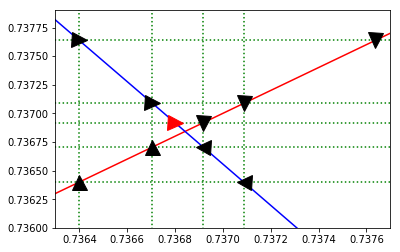

In [0]:
plt.plot(x,x,'r-',x,m1,'b-')
plt.plot(x,y1,'g:',y2,x,'g:',x,y3,'g:',y4,x,'g:',x,y5,'g:',y6,x,'g:',x,y7,'g:',y8,x,'g:',x,y9,'g:') # Rectas

# Puntos
plt.plot(Mn(r,x0,0),Mn(r,x0,1), marker='>', ms=15, color='red') # Punto (x0,x1), inicio
plt.plot(Mn(r,x0,1),Mn(r,x0,1), marker='v', ms=15, color='black') # Punto (x1,x1)
plt.plot(Mn(r,x0,1),Mn(r,x0,2), marker='<', ms=15, color='black') # Punto (x1,x2)
plt.plot(Mn(r,x0,2),Mn(r,x0,2), marker='^', ms=15, color='black') # Punto (x2,x2)
plt.plot(Mn(r,x0,2),Mn(r,x0,3), marker='>', ms=15, color='black') # Punto (x2,x3)
plt.plot(Mn(r,x0,3),Mn(r,x0,3), marker='v', ms=15, color='black') # Punto (x3,x3)
plt.plot(Mn(r,x0,3),Mn(r,x0,4), marker='<', ms=15, color='black') # Punto (x3,x4)
plt.plot(Mn(r,x0,4),Mn(r,x0,4), marker='^', ms=15, color='black') # Punto (x4,x4)
plt.plot(Mn(r,x0,4),Mn(r,x0,5), marker='>', ms=15, color='black') # Punto (x4,x5)
plt.plot(Mn(r,x0,5),Mn(r,x0,5), marker='v', ms=15, color='black') # Punto (x5,x5)

plt.xlim([0.7363,0.7377])
plt.ylim([0.7360,0.7379])

# Actividad 3

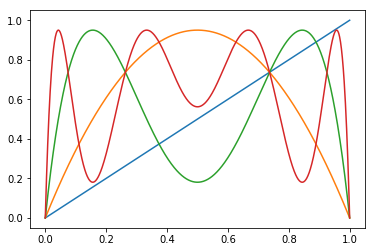

In [0]:
plt.plot(x,Mn(r,x,0))
plt.plot(x,Mn(r,x,1))
plt.plot(x,Mn(r,x,2))
plt.plot(x,Mn(r,x,3))

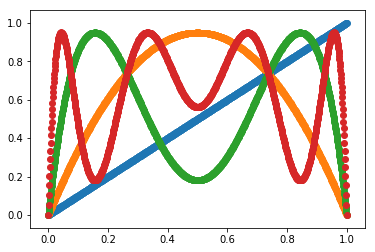

In [0]:
plt.scatter(x,Mn(r,x,0))
plt.scatter(x,Mn(r,x,1))
plt.scatter(x,Mn(r,x,2))
plt.scatter(x,Mn(r,x,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


(0.734, 0.74)

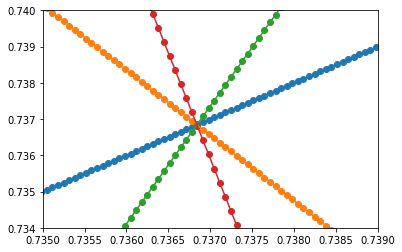

In [0]:
x = np.linspace(0,1,10000*3/2)
plt.scatter(x,Mn(r,x,0))
plt.scatter(x,Mn(r,x,1))
plt.scatter(x,Mn(r,x,2))
plt.scatter(x,Mn(r,x,3))

plt.plot(x,Mn(r,x,0))
plt.plot(x,Mn(r,x,1))
plt.plot(x,Mn(r,x,2))
plt.plot(x,Mn(r,x,3))

plt.xlim([0.735,0.739])
plt.ylim([0.734,0.740])